In [1]:
import sys
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import importlib.util
import os
import pickle
from oggm import utils
import copy
import seaborn as sns

from agile1d.sandbox.glaciers_for_idealized_experiments import experiment_glaciers

# add my functions and data paths

In [2]:
output_folder = 'plots'

## functions

In [3]:
paths_to_functions = [
    '/home/www/pschmitt/agile/final_runs_glacier_states/tools_for_analysis/',
]

for path in paths_to_functions:
    sys.path.append(path)

from df_analysis import filter_dataframe, sort_dataframe, return_settings
from get_reference_glaciers import get_fl_at_year, fp_gdirs
from plot_statistics import plot_stats_per_iteration, plot_stat_metrics
from plot_along_fl import add_bed_h_and_volume_along_fl

2025-04-04 11:35:52: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-04-04 11:35:52: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-04-04 11:35:52: oggm.cfg: Multiprocessing: using all available processors (N=32)
2025-04-04 11:35:52: oggm.workflow: init_glacier_directories by parsing all available folders (this takes time: if possible, provide rgidf instead).


## experiment settings

In [4]:
experiment_dir = '/home/www/pschmitt/agile/final_runs_glacier_states/full_run/'

In [5]:
from experiment_file_fg_oggm import experiment_options

# Set working settings for plot

In [6]:
lam = 'lam9'
obs = 'obs6'
reg = 'reg0'

# Define colors

In [7]:
plt.style.use('seaborn-v0_8-colorblind')

# Create plot Cost function and stats per iteration (fg_oggm and fg_glabtop)

In [8]:
main_results_dir = '/home/www/pschmitt/agile/final_runs_glacier_states/full_run/results_old/'

In [9]:
def get_ds_oggm(glacier, glacier_state):
    fp_pkl = os.path.join(
        main_results_dir,
        f'{glacier}_{glacier_state}_full_run_fg_oggm_{lam}_{obs}_{reg}.pkl')
    with open(fp_pkl, 'rb') as handle:
        ds_oggm = pickle.load(handle)
    return ds_oggm

In [10]:
def get_ds_glabtop(glacier, glacier_state):
    fp_pkl = os.path.join(
        main_results_dir,
        f'{glacier}_{glacier_state}_full_run_fg_glabtop_{lam}_{obs}_{reg}.pkl')
    with open(fp_pkl, 'rb') as handle:
        ds_glabtop = pickle.load(handle)
    return ds_glabtop

# plotting function for single glacier and fg

In [11]:
def plot_single_glacier_along_fl(axs, glacier, glacier_state, fg_method,
                                 iterations=np.arange(0, 21, 10),
                                 scale_by_length=True
                                ):
    if fg_method == 'oggm':
        ds = get_ds_oggm(glacier, glacier_state)
    elif fg_method == 'glabtop':
        ds = get_ds_glabtop(glacier, glacier_state)
    else:
        raise ValueError(fg_method)

    fg_title = {
        'oggm': 'OGGM',
        'glabtop': 'GlabTop',
    }

    add_bed_h_and_volume_along_fl(axs, ds,
                               glacier=glacier,
                               glacier_state=glacier_state,
                               iterations=iterations,
                               title=f'{glacier} {glacier_state}, First guess {fg_title[fg_method]}',
                               scale_by_length=scale_by_length,
                              )

    for ax in axs:
        ax.grid('on')

# plot showing detailed evolution of bed_h and volume along flowline

## Aletsch retreating

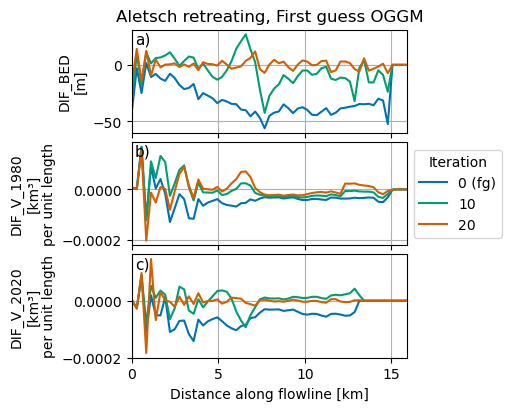

In [12]:
glacier = 'Aletsch'
glacier_state = 'retreating'
fg_method = 'oggm'

panel_labels = ['a)', 'b)', 'c)']

iterations = np.arange(0, 21, 10)

output_filename = f'{glacier}_{glacier_state}_fg_{fg_method}_diff_along_fl'

fig, axs = plt.subplots(3, 1, figsize=(5,4))#, sharex=True)

plot_single_glacier_along_fl(axs, glacier, glacier_state, fg_method,
                             iterations=iterations)

for panel_label, ax in zip(panel_labels,
                               axs):
        ax.text(
            0.01, 0.98, panel_label,
            va='top',
            ha='left',
            transform=ax.transAxes,
            fontsize=11,
            zorder=10,
        )

fig.tight_layout(pad=0.3)

plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')

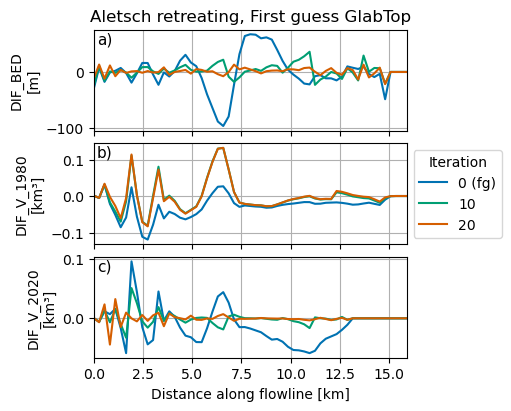

In [17]:
glacier = 'Aletsch'
glacier_state = 'retreating'
fg_method = 'glabtop'

panel_labels = ['a)', 'b)', 'c)']

iterations = np.arange(0, 21, 10)

output_filename = f'{glacier}_{glacier_state}_fg_{fg_method}_diff_along_fl'

fig, axs = plt.subplots(3, 1, figsize=(5,4))#, sharex=True)

plot_single_glacier_along_fl(axs, glacier, glacier_state, fg_method,
                             iterations=iterations)

for panel_label, ax in zip(panel_labels,
                               axs):
        ax.text(
            0.01, 0.98, panel_label,
            va='top',
            ha='left',
            transform=ax.transAxes,
            fontsize=11,
            zorder=10,
        )

fig.tight_layout(pad=0.3)

plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')

## Baltoro advancing

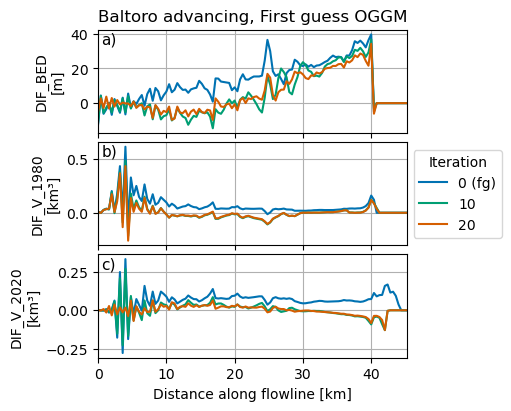

In [12]:
glacier = 'Baltoro'
glacier_state = 'advancing'
fg_method = 'oggm'

panel_labels = ['a)', 'b)', 'c)']

iterations = np.arange(0, 21, 10)

output_filename = f'{glacier}_{glacier_state}_fg_{fg_method}_diff_along_fl'

fig, axs = plt.subplots(3, 1, figsize=(5,4))#, sharex=True)

plot_single_glacier_along_fl(axs, glacier, glacier_state, fg_method,
                             iterations=iterations)

for panel_label, ax in zip(panel_labels,
                               axs):
        ax.text(
            0.01, 0.98, panel_label,
            va='top',
            ha='left',
            transform=ax.transAxes,
            fontsize=11,
            zorder=10,
        )

fig.tight_layout(pad=0.3)

plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')

## Aletsch retreating and Baltoro advancing

/tmp/ipykernel_2095683/358575339.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.3)


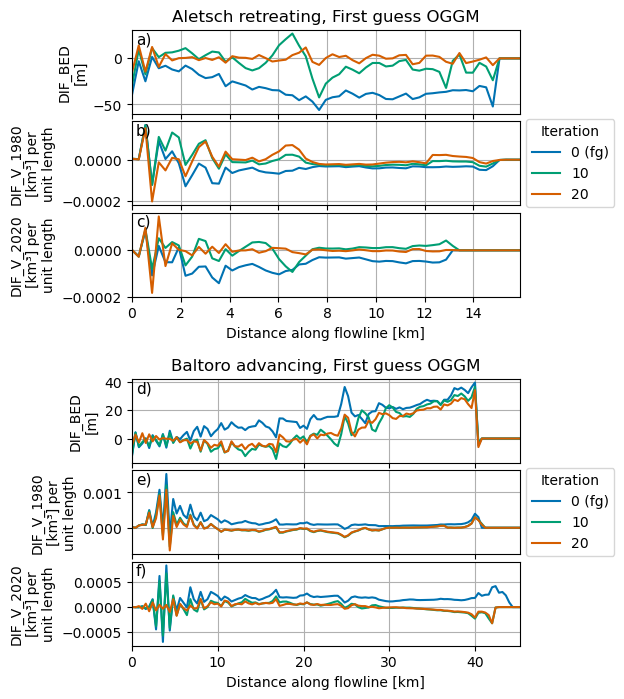

In [12]:
glaciers = ['Aletsch', 'Baltoro']
glacier_states = ['retreating', 'advancing']
fg_methods = ['oggm', 'oggm']

panel_labels_all = [['a)', 'b)', 'c)'],
                    ['d)', 'e)', 'f)']]

iterations = np.arange(0, 21, 10)

output_filename = ''

fig = plt.figure(figsize=(5, 8))

space_between_h = 0.8
gs = GridSpec(7, 1,
              height_ratios=[1, 1, 1, space_between_h,
                             1, 1, 1,
                            ],
              hspace=0.09,
             )

axs1 = []
axs2 = []
for i in range(3):
    axs1.append(fig.add_subplot(gs[i]))
    axs2.append(fig.add_subplot(gs[i+4]))

for glacier, glacier_state, fg_method, axs, panel_labels in zip(
    glaciers, glacier_states, fg_methods, [axs1, axs2], panel_labels_all
):
    output_filename += f'{glacier}_{glacier_state}_fg_{fg_method}_'
    
    plot_single_glacier_along_fl(axs, glacier, glacier_state, fg_method,
                                 iterations=iterations)
    
    for panel_label, ax in zip(panel_labels,
                                   axs):
            ax.text(
                0.01, 0.98, panel_label,
                va='top',
                ha='left',
                transform=ax.transAxes,
                fontsize=11,
                zorder=10,
            )

fig.tight_layout(pad=0.3)

output_filename += 'diff_along_fl'

plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                dpi=300, bbox_inches='tight')

# Plot for all glaciers and glacier states

In [13]:
glaciers = sorted(experiment_glaciers)
glacier_states=['retreating', 'equilibrium', 'advancing']

/tmp/ipykernel_2095683/1337999685.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.3)
/tmp/ipykernel_2095683/1337999685.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.3)
/tmp/ipykernel_2095683/1337999685.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.3)
/tmp/ipykernel_2095683/1337999685.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.3)


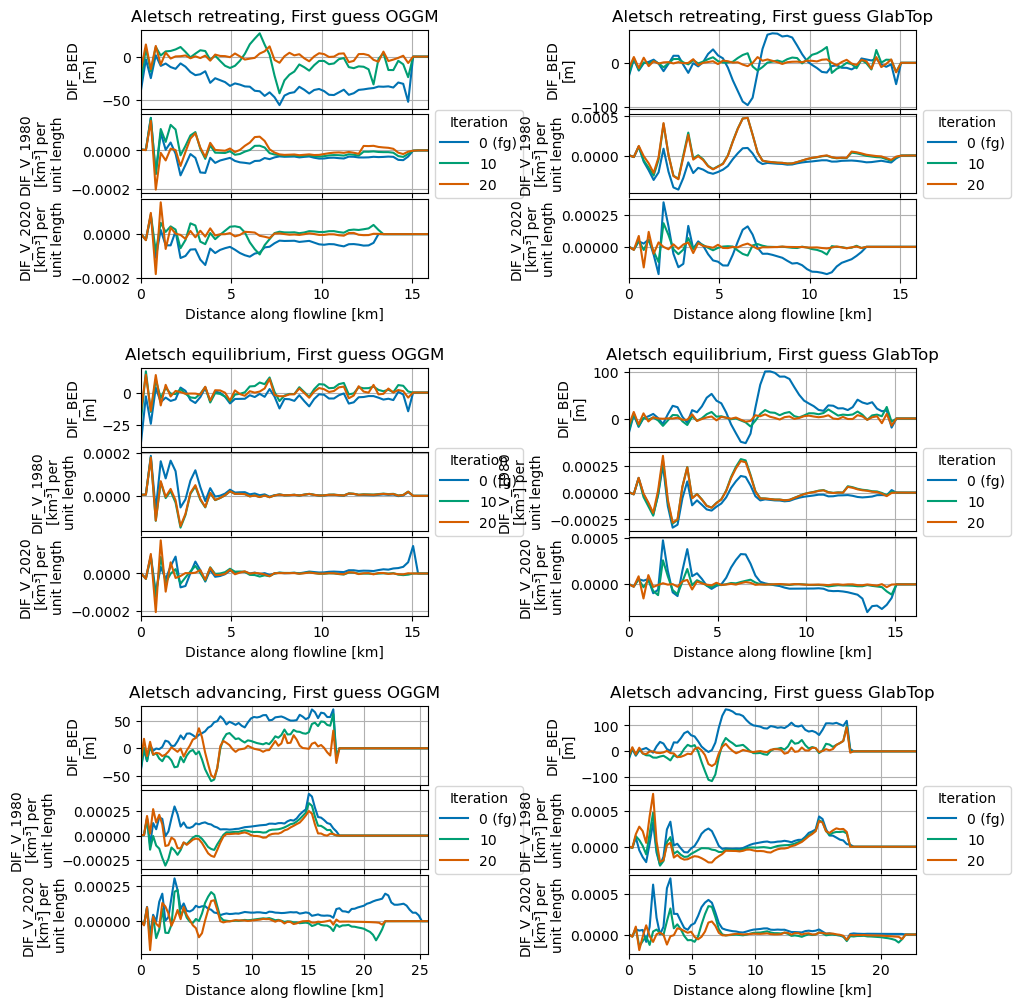

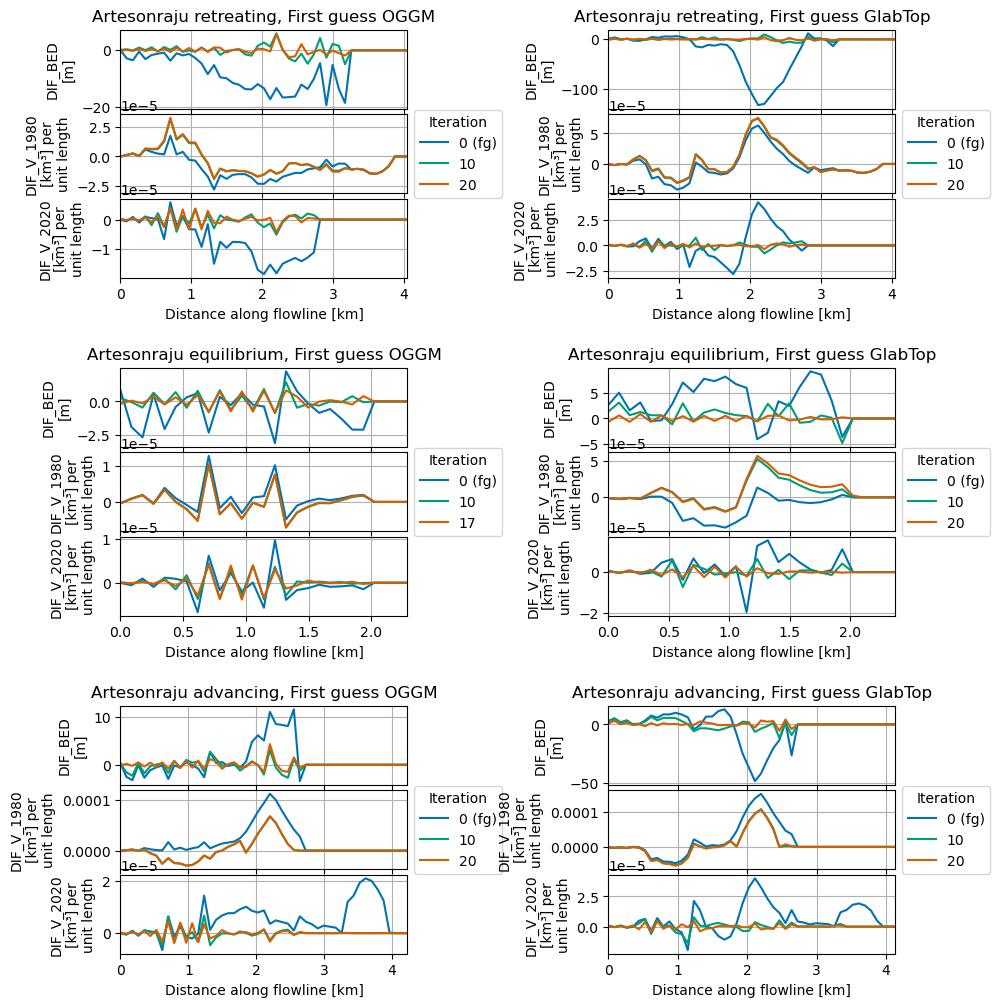

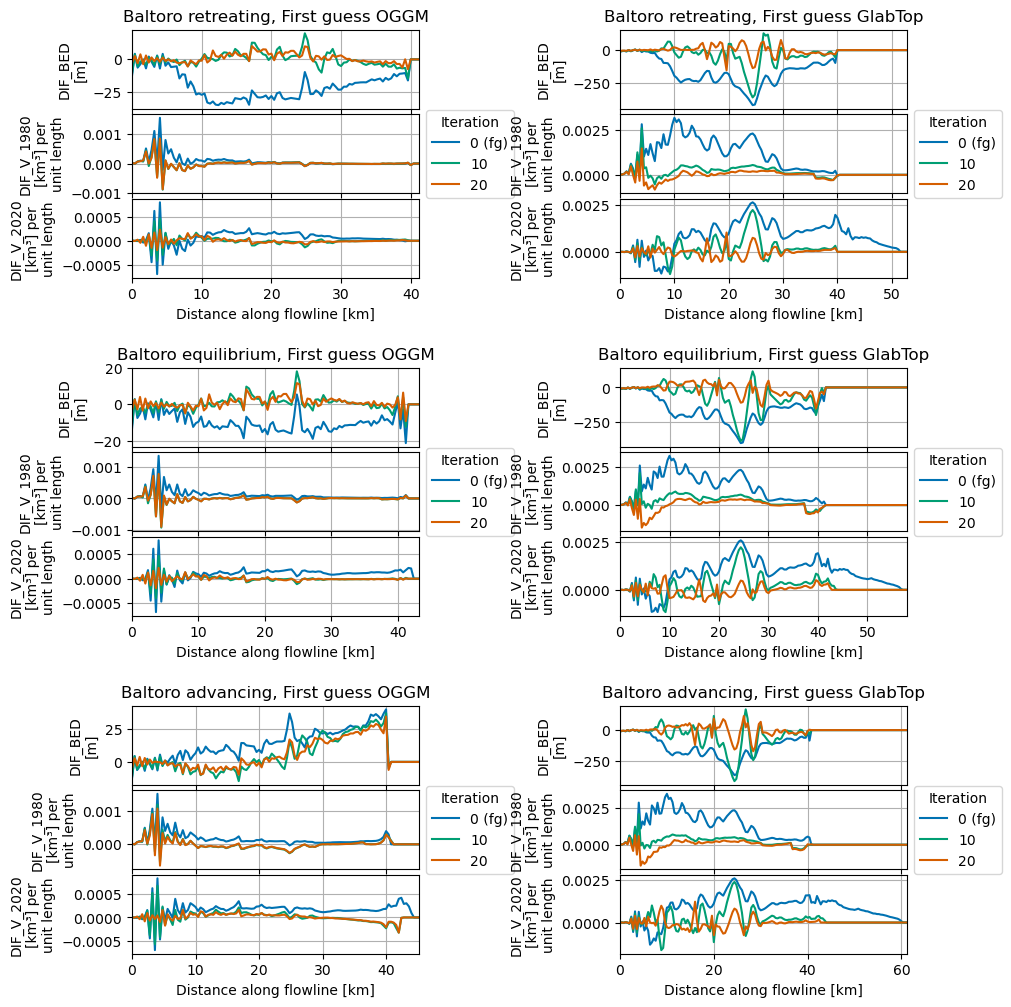

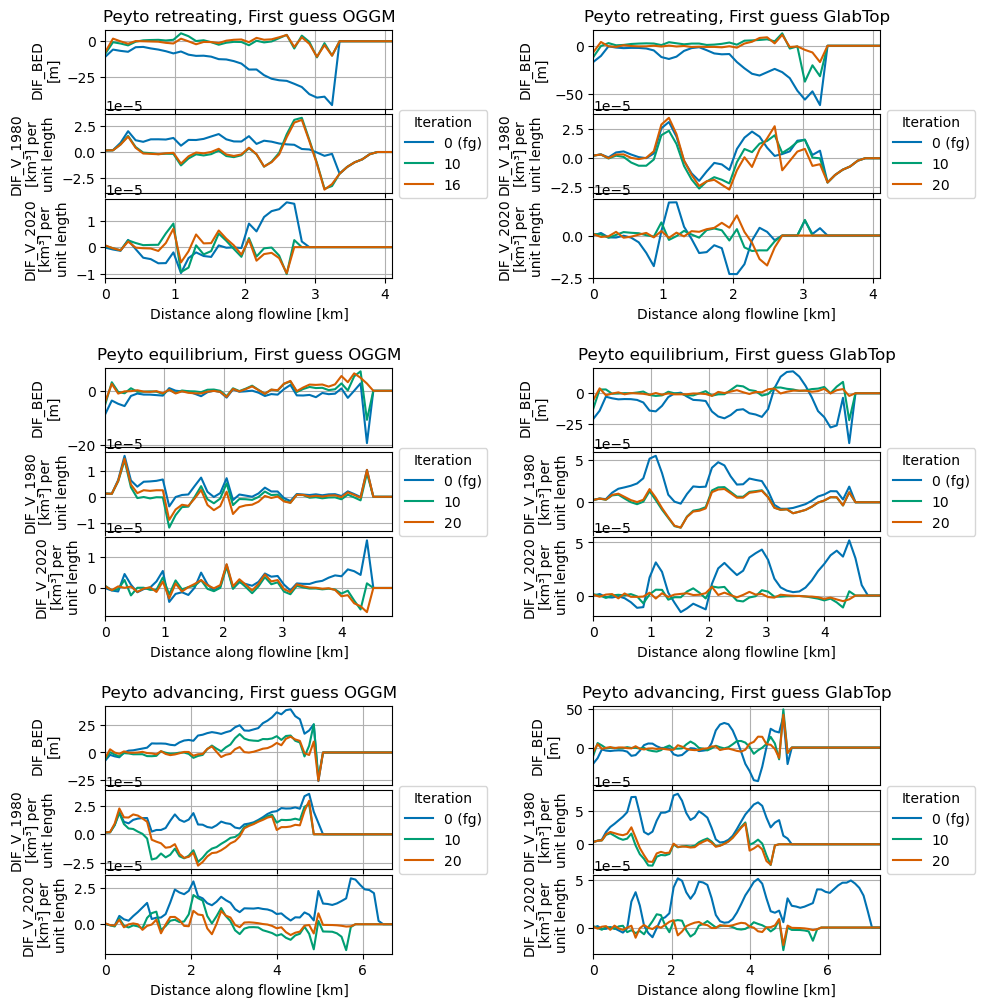

In [14]:
iterations = np.arange(0, 21, 10)

for glacier in glaciers:
    output_filename = f'{glacier}_all_diff_along_fl'

    fig = plt.figure(figsize=(10, 12))

    space_between_h = 1
    gs = GridSpec(11, 2,
                  height_ratios=[1, 1, 1, space_between_h,
                                 1, 1, 1, space_between_h,
                                 1, 1, 1,
                                ],
                  hspace=0.07,
                  wspace=0.7,
                 )

    for row, glacier_state in enumerate(glacier_states):
        start_row = row * 4

        axs_oggm = [fig.add_subplot(gs[start_row, 0]),
                    fig.add_subplot(gs[start_row + 1, 0]),
                    fig.add_subplot(gs[start_row + 2, 0])]
        axs_glabtop = [fig.add_subplot(gs[start_row, 1]),
                    fig.add_subplot(gs[start_row + 1, 1]),
                    fig.add_subplot(gs[start_row + 2, 1])]

        plot_single_glacier_along_fl(axs_oggm, glacier, glacier_state, 'oggm',
                             iterations=iterations)
        plot_single_glacier_along_fl(axs_glabtop, glacier, glacier_state, 'glabtop',
                             iterations=iterations)

    fig.tight_layout(pad=0.3)

    plt.savefig(os.path.join(output_folder, f'{output_filename}.png'),
                    dpi=300, bbox_inches='tight')